In [1]:
import numpy as np

In [2]:
class Linear_Regression:

# initialization of parameters(learning rate & no. of iterations)
    def __init__(self, learning_rate, no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations

    def fit(self, X, Y):
        # Number of training examples and number of fetures
        self.m, self.n =  X.shape
        # Initialization of weight and bias
        self.w = np.zeros(self.n) 
        self.b = 0
        self.X = X
        self.Y = Y

        # Implementation of Gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()


    def update_weights(self):
        Y_prediction = self.predict(self.X)
        
        # Gradient Calculation
        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

        db = - 2 * np.sum(self.Y - Y_prediction) / self.m

        # Updating weights
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db


    def predict(self, X):

        return X.dot(self.w) + self.b

In [3]:
# Data loading & preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('salary_data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values
X, Y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
         64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
         66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
        109431, 105582, 116969, 112635, 122391, 121872], dtype=int64))

In [9]:
# Split data into train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=2)

In [11]:
# Train model
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [12]:
model.fit(x_train, y_train)

In [18]:
model.w[0], model.b

(9514.400999035135, 23697.406507136307)

In [21]:
test_data_prediction = model.predict(x_test)

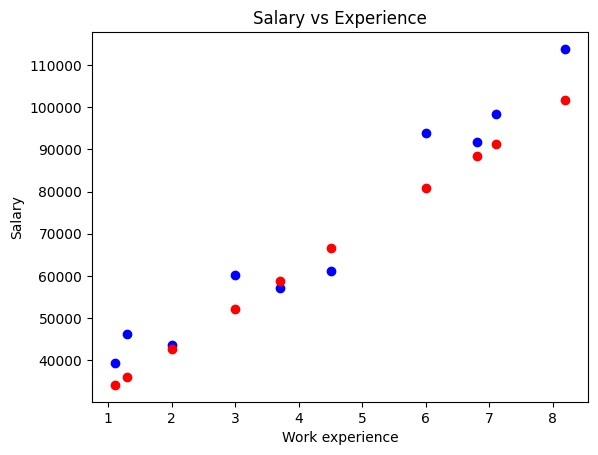

In [23]:
# Visualization of predicted and original data
plt.scatter(x_test, y_test, color='blue')
plt.scatter(x_test, test_data_prediction, color='red')
plt.xlabel('Work experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()